# Travaux pratique: Acquisition, radiométrie

**Prénom et nom:** Alice Valença De Lorenci

In [1]:
# include needed packages
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io as skio
from skimage import transform as sktransform

In [1]:
def viewimage(im, normalise=True, MINI=0.0, MAXI=255.0, show=True):
    """ 
    Cette fonction fait afficher l'image EN NIVEAUX DE GRIS.
    Par defaut normalise=True. Et dans ce cas l'image est normalisee 
    entre 0 et 255. 
    Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat.
    """
    
    if len(im.shape) > 2:
        print( "Expected a single channel image but found: {}".format( im.shape ) )
        
    imt=np.float32(im.copy())
    
    if normalise:
        m=im.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    if show:
        plt.imshow(imt, cmap='gray')
        plt.show()
        return
    else:
        return imt

def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0, show=True):
    """ 
    Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
    dans gimp. Si un gimp est deja ouvert il est utilise.
    Par defaut normalise=True. Et dans ce cas l'image est normalisee 
    entre 0 et 255 avant d'Ãªtre sauvegardee.
    Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat
    """
    
    imt=np.float32(im.copy())
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
        
    if show:
        plt.imshow(imt)
        plt.show()
        return
    else:
        return imt

## 2. Visualisation et utilisation de gimp

### 2.1. Zoom

Ouvrez l’image ```maison.tif``` et réduisez sa taille sans aucune méthode d’interpolation. Ouvrez l’image ```maison_petit.tif```. Comparez le résultat par rapport a la petite image que vous avez produite. Quelle
hypothèse pouvez-vous faire sur la génération de ```maison_petit.tif```?

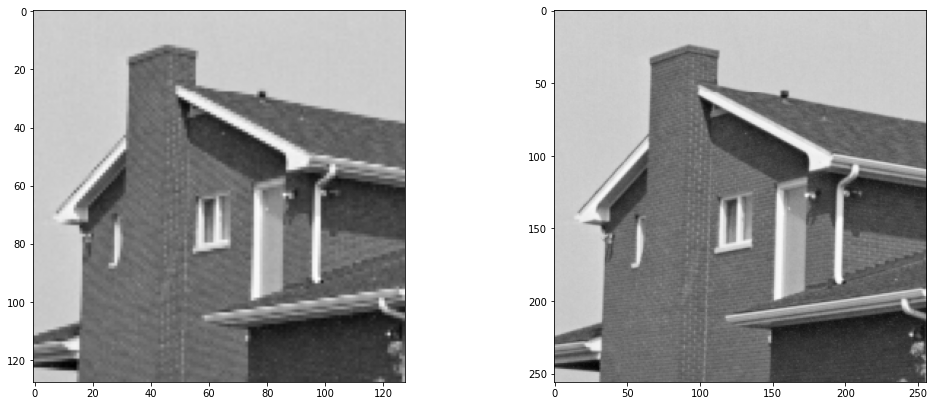

In [34]:
im1 = skio.imread('./images/maison.tif')
im2 = skio.imread('./images/maison-petit.tif')

im1_rescaled = sktransform.rescale( im1, 0.5, order=0, anti_aliasing=False )

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust( wspace=0.4 )

# axs[0].imshow( viewimage( im1, normalise=False, show=False ), cmap='gray' )
axs[0].imshow( viewimage( im1_rescaled, normalise=False, show=False), cmap='gray' )
axs[1].imshow( viewimage( im2, normalise=False, show=False), cmap='gray' )

viewimage(im1)

## 3. Niveaux de gris, histogrammes et statistiques

### 3.1. Histogramme

Nous étudions maintenant l’effet de dégradations simples des images sur leur histogramme. A
l’aide de la fonction noise, ajoutez un bruit gaussien à une image et étudiez l’effet produit sur son
histogramme.

In [3]:
def histogram(im, plot=True):

    if len(im.shape) > 2:
        print( "Expected a single channel image but found: {}".format( im.shape ) )
        
    imt=np.float32(im.copy())
    
    if plot:
        plt.hist( imt.reshape((-1,)), bins=255 ) 
        plt.show()
        return
    else:
        (histo,bins) = np.histogram( imt.reshape((-1,)),np.arange(0,256) )
        return histo
    
def cumulative_histogram(im, plot=True):

    if len(im.shape) > 2:
        print( "Expected a single channel image but found: {}".format( im.shape ) )
        
    imt=np.float32(im.copy())

    (histo,bins) = np.histogram( imt.reshape((-1,)),np.arange(0,256) )
    histo = histo/histo.sum()
    histocum = histo.cumsum()
    
    if plot: 
        plt.plot(histocum)
        plt.show()
        return
    else:
        return histocum

In [4]:
def noise(im, br):
    """ 
    Cette fonction ajoute un bruit blanc gaussier d'ecart type br
    a l'image im et renvoie le resultat
    """
    
    imt = np.float32(im.copy())
    sh = imt.shape
    bruit = br*np.random.randn(*sh)
    imt = imt + bruit
    return imt

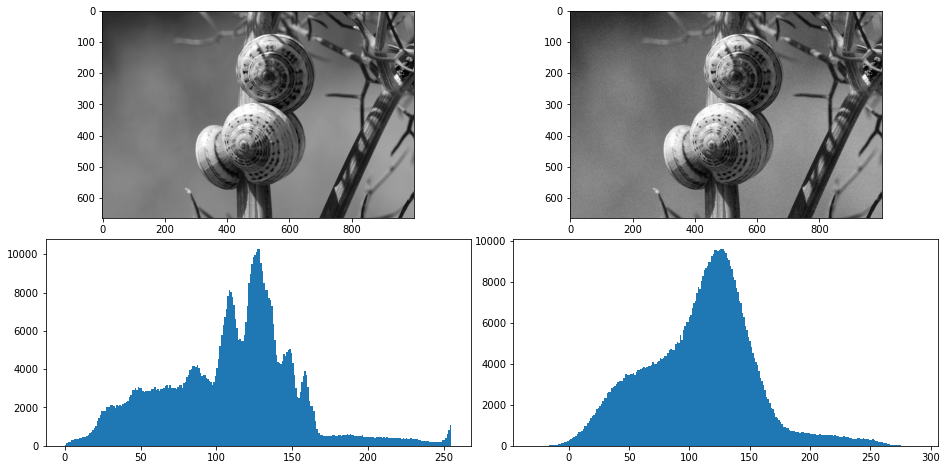

In [40]:
im = skio.imread('./images/spirale.jpg').mean(axis=2)
imt = np.float32( im.copy() )
imb = noise(im,10)

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
plt.subplots_adjust( hspace=0.1, wspace=0.1 )

axs[0][0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[0][1].imshow( viewimage( imb, normalise=False, show=False), cmap='gray' )

axs[1][0].hist( imt.reshape((-1,)), bins=255 ) 
axs[1][1].hist( imb.reshape((-1,)), bins=255 ) 

plt.show()

### 3.2. Changement de contraste

L’aspect global de l’image est-il modifié par l’application de fonctions croissantes? Que se passe-t-il si l’on
applique une transformation non-croissante des niveaux de gris?

Verifiez l’effet de deux changements de contraste très simples:
- luminosité l’ajout d’une constante
- contraste la multiplication par une constante après centrage sur la valeur centrale de l’histogramme
(i.e. (im − 128) ∗ k + 128)

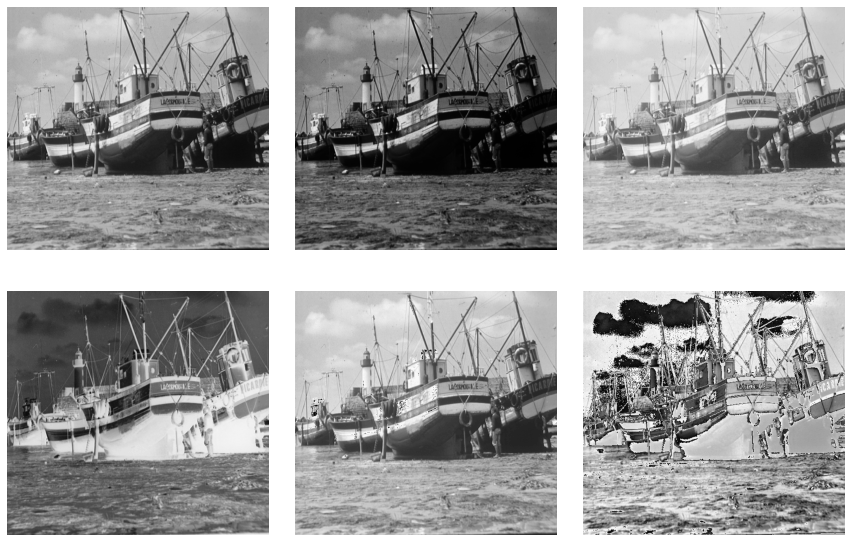

In [72]:
im = skio.imread('./images/bat.tif')
imr = viewimage( im, normalise=False, show=False ) # rescale image to 0:1

im1 = imr**2         # increasing function
im2 = np.sqrt(imr)   # increasing function
im3 = 1.0 - imr      # decreasing function
im4 = im + 20        # brightness change
im5 = (im-128)*2+128 # multiplication after centering

fig, axs = plt.subplots( 2, 3, figsize=(15, 10) )
plt.subplots_adjust( hspace=0.1, wspace=0.1 )
axs = axs.reshape(-1)

axs[0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( im1, normalise=False, MINI=0.0, MAXI=1.0, show=False ), cmap='gray' )
axs[2].imshow( viewimage( im2, normalise=False, MINI=0.0, MAXI=1.0, show=False ), cmap='gray' )
axs[3].imshow( viewimage( im3, normalise=False, MINI=0.0, MAXI=1.0, show=False ), cmap='gray' )
axs[4].imshow( viewimage( im4, normalise=False, show=False ), cmap='gray' )
axs[5].imshow( viewimage( im5, normalise=False, show=False ), cmap='gray' )

for ax in axs:
    ax.axis('off')
    
plt.show()

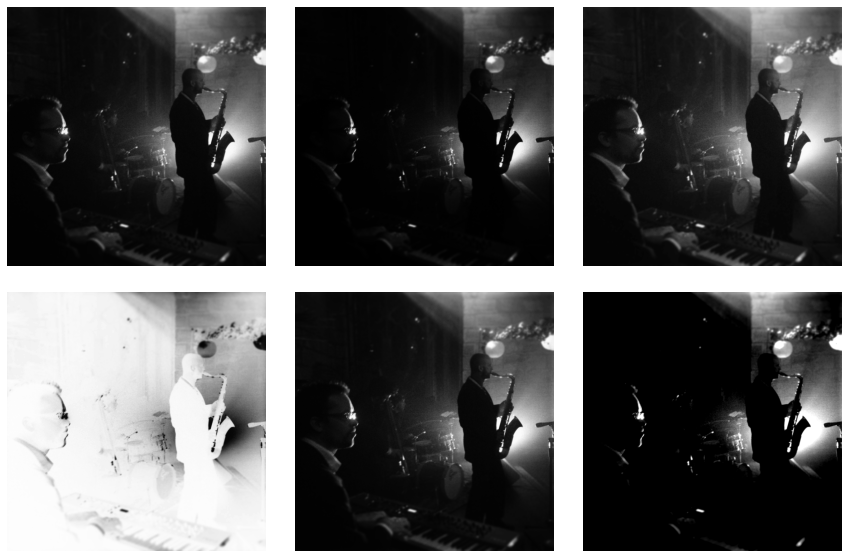

In [73]:
im = skio.imread('./images/sombre.jpg').mean(axis=2)
imr = viewimage( im, normalise=False, show=False ) # rescale image to 0:1

im1 = imr**2         # increasing function
im2 = np.sqrt(imr)   # increasing function
im3 = 1.0 - imr      # decreasing function
im4 = im + 20        # brightness change
im5 = (im-128)*2+128 # multiplication after centering

fig, axs = plt.subplots( 2, 3, figsize=(15, 10) )
plt.subplots_adjust( hspace=0.1, wspace=0.1 )
axs = axs.reshape(-1)

axs[0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( im1, normalise=False, MINI=0.0, MAXI=1.0, show=False ), cmap='gray' )
axs[2].imshow( viewimage( im2, normalise=False, MINI=0.0, MAXI=1.0, show=False ), cmap='gray' )
axs[3].imshow( viewimage( im3, normalise=False, MINI=0.0, MAXI=1.0, show=False ), cmap='gray' )
axs[4].imshow( viewimage( im4, normalise=False, show=False ), cmap='gray' )
axs[5].imshow( viewimage( im5, normalise=False, show=False ), cmap='gray' )

for ax in axs:
    ax.axis('off')
    
plt.show()

### 3.3 Egalisation d’histogramme

Comme vu en cours, l’égalisation d’histogramme consiste à utiliser comme changement de contraste
l’histogramme cumulé de l’image traitée. Visualisez son effet (par exemple sur l’image ```sombre.jpg```).

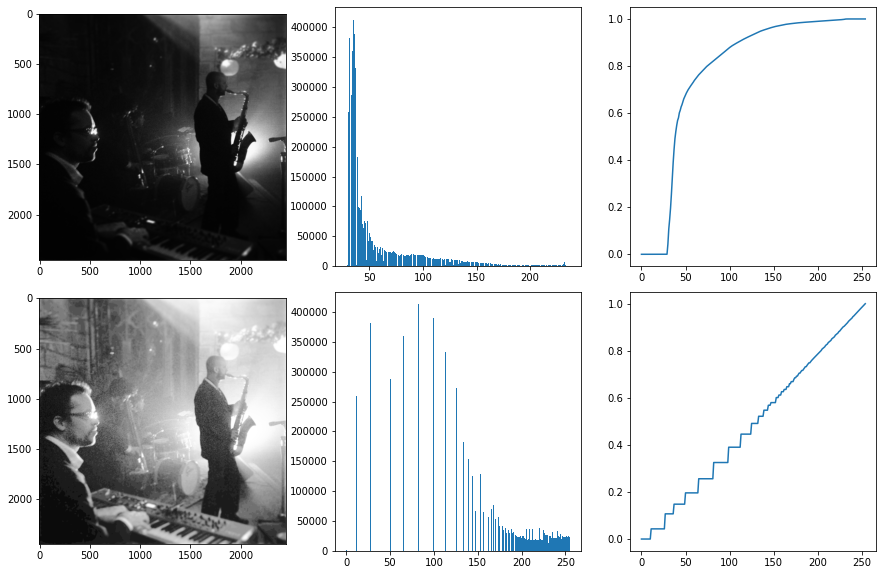

In [80]:
im = skio.imread('./images/sombre.jpg').mean(axis=2)
chist = cumulative_histogram( im, plot=False )

fig, axs = plt.subplots( 2, 3, figsize=(15, 10) )
plt.subplots_adjust( hspace=0.1, wspace=0.2 )

axs[0][0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[0][1].hist( np.float32( im ).reshape((-1,)), bins=255 ) 
axs[0][2].plot( chist )

imequal = 255.0*chist[ np.uint8(im) ]
chistequal = cumulative_histogram( imequal, plot=False )

axs[1][0].imshow( viewimage( imequal, normalise=False, show=False ), cmap='gray' )
axs[1][1].hist( np.float32( imequal ).reshape((-1,)), bins=255 ) 
axs[1][2].plot( chistequal )
    
plt.show()

### 3.4 Prescription d’histogramme

Les images ```vue1.tif``` et ```vue2.tif``` sont deux prises de vue d’une même scène avec la même ouverture et des temps d’expositions différents. Visualisez la valeur absolue de la différence des images, qu’observe-t-on. Même question après avoir donné à l’une des images l’histogramme de l’autre. A-t-on un moyen plus simple d’obtenir le même résultat (donner le même histogramme aux deux images), dans le cas particulier de ces deux images?

Donnez un code simple permettant d’égaliser
l’histogramme d’une image (le rendre aussi proche que possible d’une fonction constante).

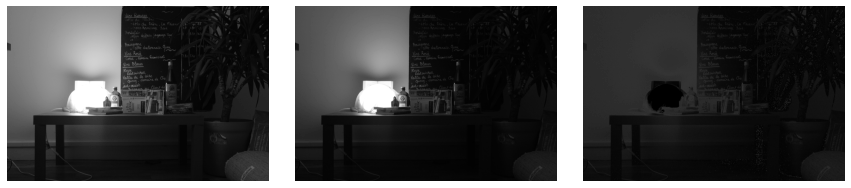

In [85]:
u=skio.imread('images/vue1.tif')
v=skio.imread('images/vue2.tif')

fig, axs = plt.subplots( 1, 3, figsize=(15, 4) )
plt.subplots_adjust( wspace=0.1 )

axs[0].imshow( viewimage( u, show=False ), cmap='gray' )
axs[1].imshow( viewimage( v, show=False ), cmap='gray' )
axs[2].imshow( viewimage( np.abs(u-v), show=False ), cmap='gray' )

for ax in axs:
    ax.axis('off')
    
plt.show()

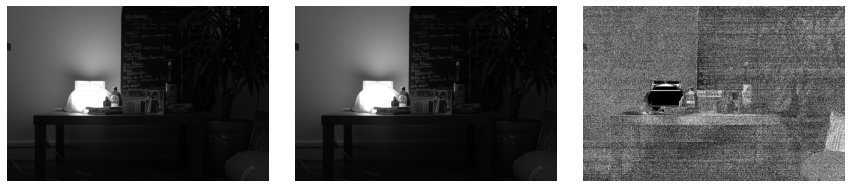

In [90]:
ind = np.unravel_index(np.argsort(u, axis=None), u.shape)
unew = np.zeros( u.shape, u.dtype )
unew[ind] = np.sort(v, axis=None)

fig, axs = plt.subplots( 1, 3, figsize=(15, 4) )
plt.subplots_adjust( wspace=0.1 )

axs[0].imshow( viewimage( unew, show=False ), cmap='gray' )
axs[1].imshow( viewimage( v, show=False ), cmap='gray' )
axs[2].imshow( viewimage( np.abs(unew-v), show=False ), cmap='gray' )

for ax in axs:
    ax.axis('off')
    
plt.show()

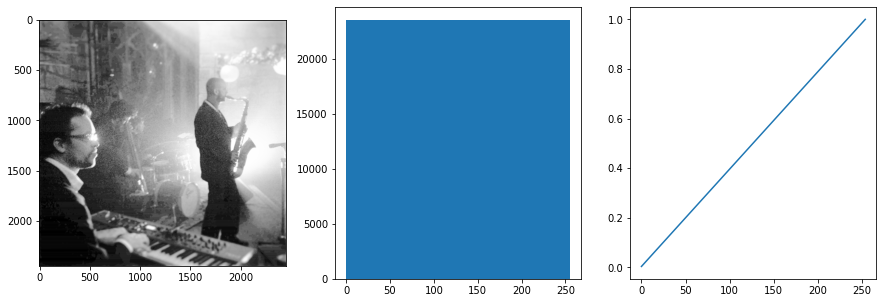

In [101]:
im = skio.imread('./images/sombre.jpg').mean(axis=2)

ind = np.unravel_index( np.argsort(im, axis=None), im.shape )
imequal = np.zeros( im.shape, im.dtype )
imequal[ind] = np.linspace( 0.0, 255.0, num=np.prod(im.shape) ).astype(int)

chist = cumulative_histogram( imequal, plot=False )

fig, axs = plt.subplots( 1, 3, figsize=(15, 5) )
plt.subplots_adjust( wspace=0.2 )

axs[0].imshow( viewimage( imequal, normalise=False, show=False ), cmap='gray' )
axs[1].hist( np.float32( imequal ).reshape((-1,)), bins=255 ) 
axs[2].plot( chist )
    
plt.show()

### 3.5 Dithering

Le dithering (ou détramage) est une technique utilisée à l’origine pour obtenir un rendu en niveaux de
gris lorsque l’appareil d’impression ne disposait que de deux couleurs (noir et blanc). Observez l’effet d’une quantification de plus en plus brutale sur une image.

Pour comprendre la méthode du dithering, commencez par seuiller une image et visualisez le résultat. Appliquez le même seuillage à une version bruitée de l’image originale et visualisez. Que constatez vous?

In [5]:
def quantize(im,n=2):
    """
    Renvoie une version quantifiee de l'image sur n (=2 par defaut) niveaux.  
    """
    imt=np.float32(im.copy())
    if np.floor(n)!= n or n<2:
        raise Exception("La valeur de n n'est pas bonne dans quantize")
    else:
        m=imt.min()
        M=imt.max()
        imt=np.floor(n*((imt-m)/(M-m)))*(M-m)/n+m
        imt[imt==M]=M-(M-m)/n #cas des valeurs maximales
        return imt
    
def seuil(im,s):
    """ 
    Renvoie une image blanche(255) la ou im>=s et noire (0) ailleurs.
    """
    imt=np.float32(im.copy())
    mask=imt<s
    imt[mask]=0
    imt[~mask]=255
    return imt

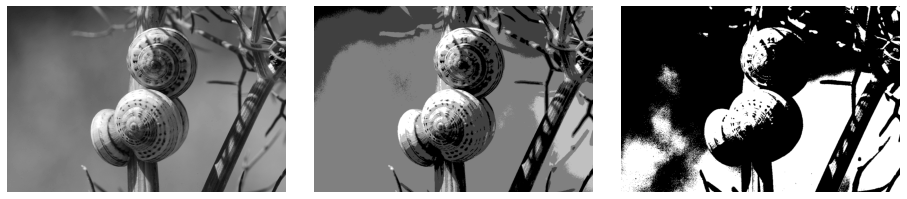

In [116]:
im = skio.imread('./images/spirale.jpg').mean(axis=2)

im10 = quantize(im, n=5)
im2 = quantize(im, n=2)

fig, axs = plt.subplots( 1, 3, figsize=(16, 5) )
plt.subplots_adjust( wspace=0.1 )

axs[0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( im10, normalise=False, show=False ), cmap='gray' )
axs[2].imshow( viewimage( im2, normalise=False, show=False ), cmap='gray' )

for ax in axs:
    ax.axis('off')
    
plt.show()

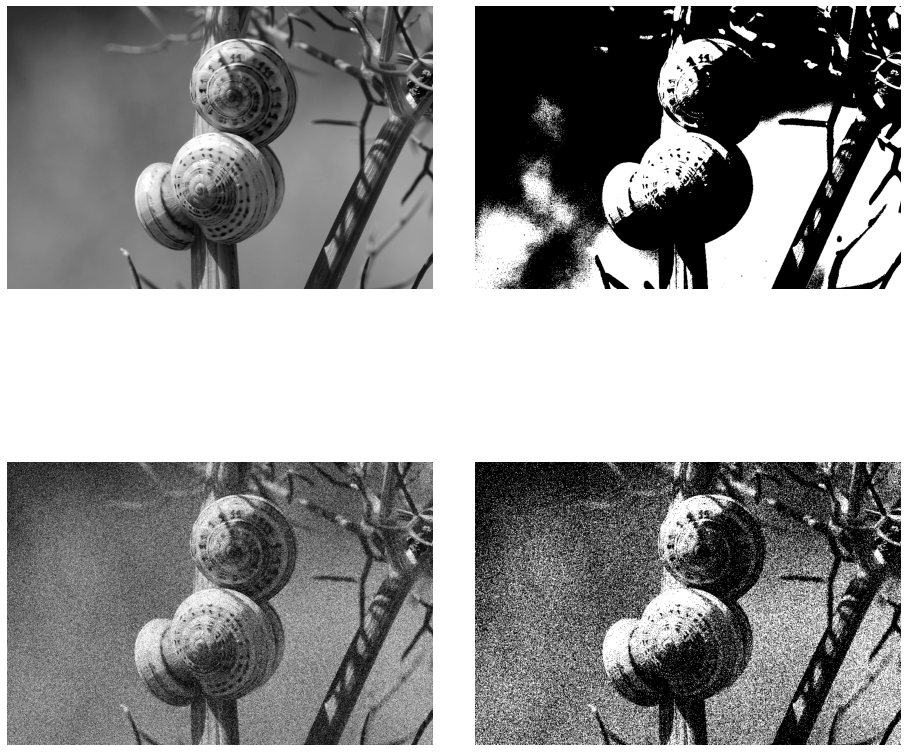

In [120]:
im = skio.imread('./images/spirale.jpg').mean(axis=2)

imq = seuil(im, 128)
imb = noise(im,50)
imbq = seuil(imb, 128)

fig, axs = plt.subplots( 2, 2, figsize=(16, 16) )
axs = axs.reshape(-1)
plt.subplots_adjust( hspace=0.1, wspace=0.1 )

axs[0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( imq, normalise=False, show=False ), cmap='gray' )
axs[2].imshow( viewimage( imb, normalise=False, show=False ), cmap='gray' )
axs[3].imshow( viewimage( imbq, normalise=False, show=False ), cmap='gray' )

for ax in axs:
    ax.axis('off')
    
plt.show()

### 3.6 Différences de niveaux de gris voisins

On veut maintenant étudier la statistique de la différence de niveau de gris entre deux pixels adjacents. Visualisez l’histogramme de l'image de la différence entre pixels adjacents. Visualisez le logarithme de l’histogramme.

La distribution des différences vous semble-t-elle obéir a une loi gaussienne ? Pourquoi ? Quelle
aurait été la forme de l’histogramme si l’on avait considéré la différences entre pixels plus éloignés?

In [6]:
def gradx(im, step=1):
    "renvoie le gradient dans la direction x"
    imt=np.float32(im)
    gx=0*imt
    gx[:,:-step]=imt[:,step:]-imt[:,:-step]
    return gx

def grady(im, step=1):
    "renvoie le gradient dans la direction y"
    imt=np.float32(im)
    gy=0*imt
    gy[:-step,:]=imt[step:,:]-imt[:-step,:]
    return gy

/tmp/ipykernel_5880/3672391218.py:3: RuntimeWarning: divide by zero encountered in log
  logh = np.log( histogram( imgrad, plot=False ) )
/tmp/ipykernel_5880/3672391218.py:6: RuntimeWarning: divide by zero encountered in log
  logh5 = np.log( histogram( imgrad5, plot=False ) )


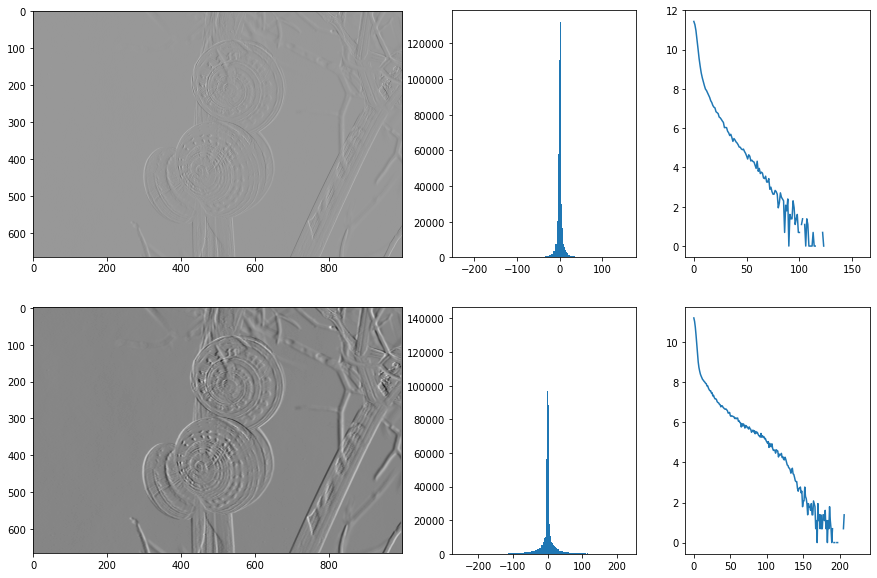

In [45]:
im = skio.imread('./images/spirale.jpg').mean(axis=2)
imgrad = gradx(im, step=1)
logh = np.log( histogram( imgrad, plot=False ) )

imgrad5 = gradx(im, step=5)
logh5 = np.log( histogram( imgrad5, plot=False ) )

fig, axs = plt.subplots( 2, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [2, 1, 1]} )
axs = axs.reshape(-1)
plt.subplots_adjust( hspace=0.2, wspace=0.2 )

axs[0].imshow( viewimage( imgrad, normalise=True, show=False ), cmap='gray' )
axs[1].hist( np.float32( imgrad ).reshape((-1,)), bins=255 ) 
axs[2].plot( logh )

axs[3].imshow( viewimage( imgrad5, normalise=True, show=False ), cmap='gray' )
axs[4].hist( np.float32( imgrad5 ).reshape((-1,)), bins=255 ) 
axs[5].plot( logh5 )
    
plt.show()

## 4. Spectre des images et transformation de Fourier

### 4.1. Visualisation de spectres

Afficher les spectres de différentes images de maniere lineaire et en utilisant le log. Que constatez-vous? Qu’en déduisez-vous par rapport au spectre d’une image?

Comment influe l’option hamming sur le spectre de l’image (multiplication de l’image originale
par une fonction très lisse qui s’annule aux bords de l’image)?

Visualisez le spectre de l’image synthétique ```rayures.tif```. Que constatez-vous? Peut-on retrouver
les caractéristiques des rayures de l’image à partir de son spectre? Expliquez la différence entre la
visualisation avec et sans l’option hamming? Quel effet a le sous-échantillonnage sur le spectre (on
peut utiliser une image synthétique et une image naturelle).

In [7]:
def spectre(im, option=1, hamming=False):
    
    """ affiche le spectre d'une image
     si option =1 on affiche l'intensite de maniere lineaire
     si option =2 on affiche le log
     si hamming=True (defaut False) alors une fenetre de hamming est appliquee avant de prendre la transformee de Fourier
     """
    
    imt=np.float32(im.copy())
    (ty,tx)=im.shape
    pi=np.pi
    if hamming:
        XX=np.ones((ty,1))@(np.arange(0,tx).reshape((1,tx)))
        YY=(np.arange(0,ty).reshape((ty,1)))@np.ones((1,tx))
        imt=(1-np.cos(2*pi*XX/(tx-1)))*(1-np.cos(2*pi*YY/(ty-1)))*imt
    aft=np.fft.fftshift(abs(np.fft.fft2(imt)))
    
    if option==1:
        return aft
    else:
        return np.log(0.1+aft)

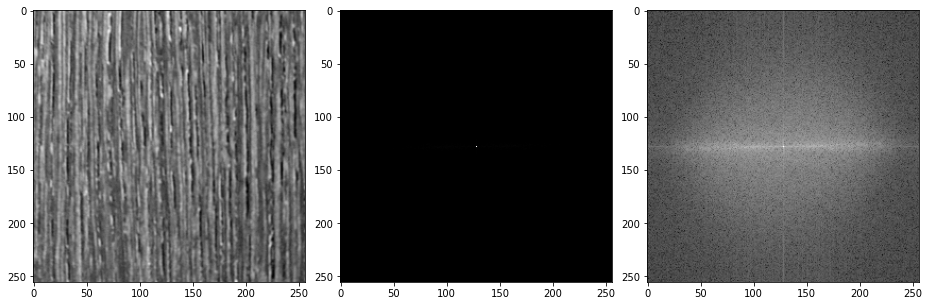

In [155]:
im = skio.imread('./images/bois.tif')

tfd = spectre(im)               # spectrum
tfdlog = spectre(im, option=2)  # log of the spectrum

fig, axs = plt.subplots( 1, 3, figsize=(16, 5) )
axs = axs.reshape(-1)
plt.subplots_adjust( wspace=0.1 )

axs[0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( tfd, show=False ), cmap='gray' )
axs[2].imshow( viewimage( tfdlog, show=False ), cmap='gray' )
    
plt.show()

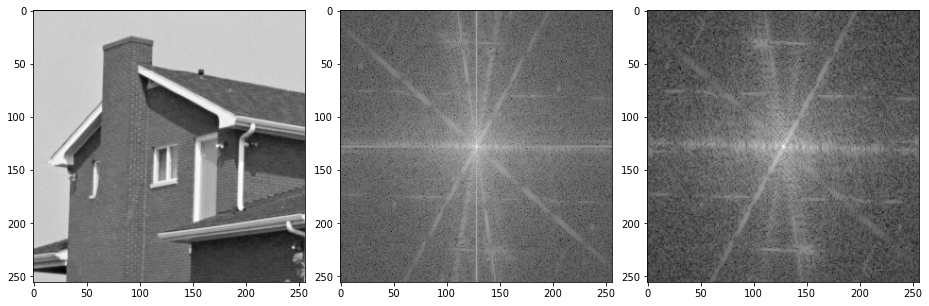

In [165]:
im = skio.imread('./images/maison.tif')

tfd = spectre(im, option=2)                 # spectrum of the image
tfdh = spectre(im, option=2, hamming=True)  # spectrum of image*hamming

fig, axs = plt.subplots( 1, 3, figsize=(16, 5) )
axs = axs.reshape(-1)
plt.subplots_adjust( hspace=0.1, wspace=0.1 )

axs[0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( tfd, show=False ), cmap='gray' )
axs[2].imshow( viewimage( tfdh, show=False ), cmap='gray' )
    
plt.show()

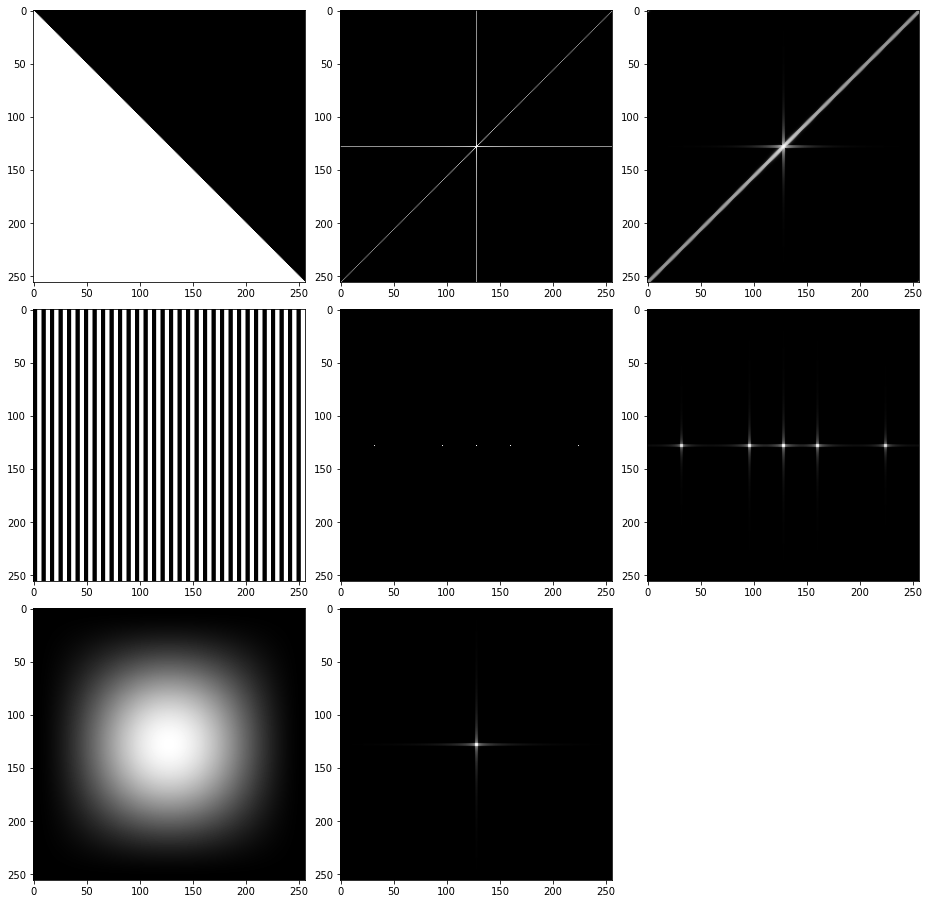

In [13]:
im_tri = np.tril( np.ones( (256,256) ) )
tfd_tri = spectre( im_tri, option=2 )                 
tfdh_tri = spectre( im_tri, option=2, hamming=True )  

im_ray = np.ones( (256,256) )
T = 8
for i in range( im_ray.shape[-1] ):
    im_ray[:,i] = np.round( (i%T+1)/T )
    
tfd_ray = spectre( im_ray, option=2 )                 
tfdh_ray = spectre( im_ray, option=2, hamming=True )  

(ty,tx)=(256, 256)
pi=np.pi
XX=np.ones((ty,1))@(np.arange(0,tx).reshape((1,tx)))
YY=(np.arange(0,ty).reshape((ty,1)))@np.ones((1,tx))
im_ham=(1-np.cos(2*pi*XX/(tx-1)))*(1-np.cos(2*pi*YY/(ty-1)))
tfd_ham = spectre( im_ham, option=2 )              

fig, axs = plt.subplots( 3, 3, figsize=(16, 16) )
axs = axs.reshape(-1)
plt.subplots_adjust( hspace=0.1, wspace=0.1 )

axs[0].imshow( viewimage( im_tri, show=False ), cmap='gray' )
axs[1].imshow( viewimage( tfd_tri, show=False ), cmap='gray' )
axs[2].imshow( viewimage( tfdh_tri, show=False ), cmap='gray' )

axs[3].imshow( viewimage( im_ray, show=False ), cmap='gray' )
axs[4].imshow( viewimage( tfd_ray, show=False ), cmap='gray' )
axs[5].imshow( viewimage( tfdh_ray, show=False ), cmap='gray' )

axs[6].imshow( viewimage( im_ham, show=False ), cmap='gray' )
axs[7].imshow( viewimage( tfd_ham, show=False ), cmap='gray' )
axs[8].axis('off')
    
plt.show()

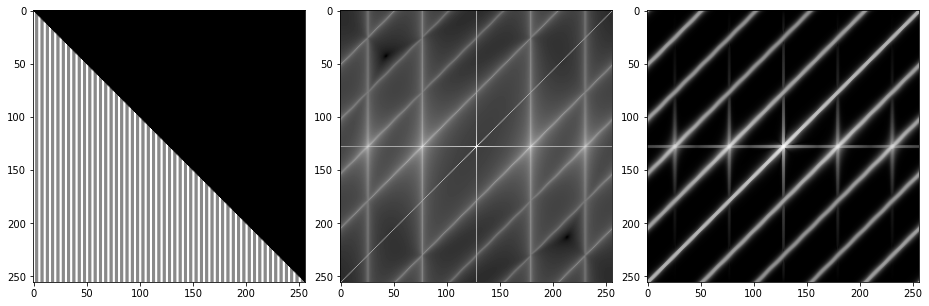

In [167]:
im = skio.imread('./images/rayures.tif')

tfd = spectre(im, option=2)                 # spectrum of the image
tfdh = spectre(im, option=2, hamming=True)  # spectrum of image*hamming

fig, axs = plt.subplots( 1, 3, figsize=(16, 5) )
axs = axs.reshape(-1)
plt.subplots_adjust( hspace=0.1, wspace=0.1 )

axs[0].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( tfd, show=False ), cmap='gray' )
axs[2].imshow( viewimage( tfdh, show=False ), cmap='gray' )
    
plt.show()

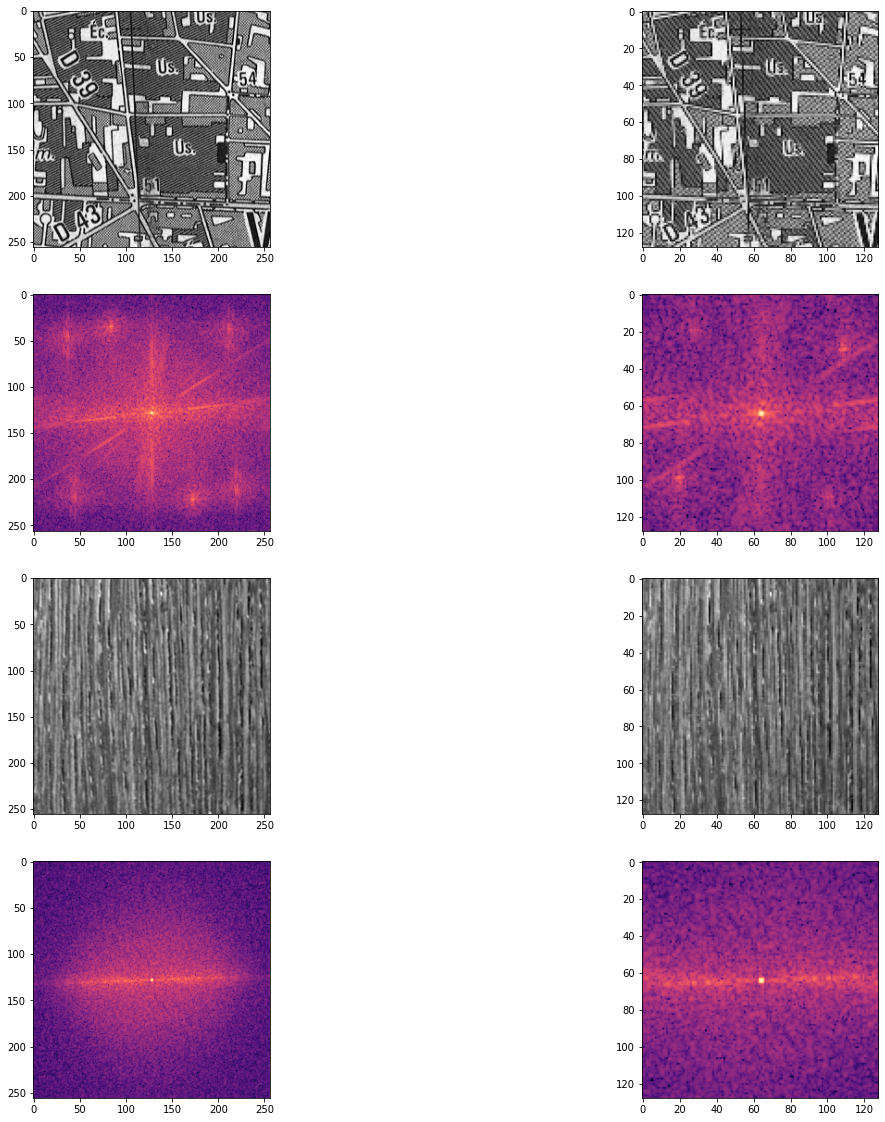

In [36]:
im1 = skio.imread('./images/carte_nb.tif')
im2 = skio.imread('./images/bois.tif')

im1_sous = im1[::2,::2]
im2_sous = im2[::2,::2]

tfd1 = spectre(im1, option=2, hamming=True)   
tfd1_sous = spectre(im1_sous, option=2, hamming=True)  

tfd2 = spectre(im2, option=2, hamming=True)   
tfd2_sous = spectre(im2_sous, option=2, hamming=True)  

fig, axs = plt.subplots( 4, 2, figsize=(20, 20) )
axs = axs.reshape(-1)
plt.subplots_adjust( wspace=0.2 )

axs[0].imshow( viewimage( im1, normalise=False, show=False ), cmap='gray' )
axs[1].imshow( viewimage( im1_sous, normalise=False, show=False ), cmap='gray' )

axs[2].imshow( viewimage( tfd1, show=False ), cmap='magma' )
axs[3].imshow( viewimage( tfd1_sous, show=False ), cmap='magma' )

axs[4].imshow( viewimage( im2, normalise=False, show=False ), cmap='gray' )
axs[5].imshow( viewimage( im2_sous, normalise=False, show=False ), cmap='gray' )

axs[6].imshow( viewimage( tfd2, show=False ), cmap='magma' )
axs[7].imshow( viewimage( tfd2_sous, show=False ), cmap='magma' )
    
plt.show()

### 4.2. Ringing

Appliquez un filtre passe bas parfait à une image. Visualisez l’image résultante, ainsi que son spectre. Que constatez-vous? Mêmes questions en utilisant un filtre gaussien.

Visualisez les deux masques, l'un pour le filtrage passe-bas parfait e l'un pour le filtrage gaussien. Quelle différence constatez-vous, en particulier quelle conséquence a la discontinuité de la transformée de Fourier sur la vitesse de décroissance du filtre spatial correspondant?

In [34]:
def filterlow(im): 
    """applique un filtre passe-bas parfait a une image (taille paire)"""
    (ty,tx)=im.shape
    imt=np.float32(im.copy())
    pi=np.pi
    XX=np.concatenate((np.arange(0,tx/2+1),np.arange(-tx/2+1,0)))
    XX=np.ones((ty,1))@(XX.reshape((1,tx)))
    
    YY=np.concatenate((np.arange(0,ty/2+1),np.arange(-ty/2+1,0)))
    YY=(YY.reshape((ty,1)))@np.ones((1,tx))
    mask=(abs(XX)<tx/4) & (abs(YY)<ty/4)
    imtf=np.fft.fft2(imt)
    imtf[~mask]=0
    return np.real(np.fft.ifft2(imtf))

def filtergauss(im):
    """applique un filtre passe-bas gaussien. coupe approximativement a f0/4"""
    (ty,tx)=im.shape
    imt=np.float32(im.copy())
    pi=np.pi
    XX=np.concatenate((np.arange(0,tx/2+1),np.arange(-tx/2+1,0)))
    XX=np.ones((ty,1))@(XX.reshape((1,tx)))
    
    YY=np.concatenate((np.arange(0,ty/2+1),np.arange(-ty/2+1,0)))
    YY=(YY.reshape((ty,1)))@np.ones((1,tx))
    # C'est une gaussienne, dont la moyenne est choisie de sorte que
    # l'integrale soit la meme que celle du filtre passe bas
    # (2*pi*sig^2=1/4*x*y (on a suppose que tx=ty))
    sig=(tx*ty)**0.5/2/(pi**0.5)
    mask=np.exp(-(XX**2+YY**2)/2/sig**2)
    imtf=np.fft.fft2(imt)*mask
    return np.real(np.fft.ifft2(imtf))

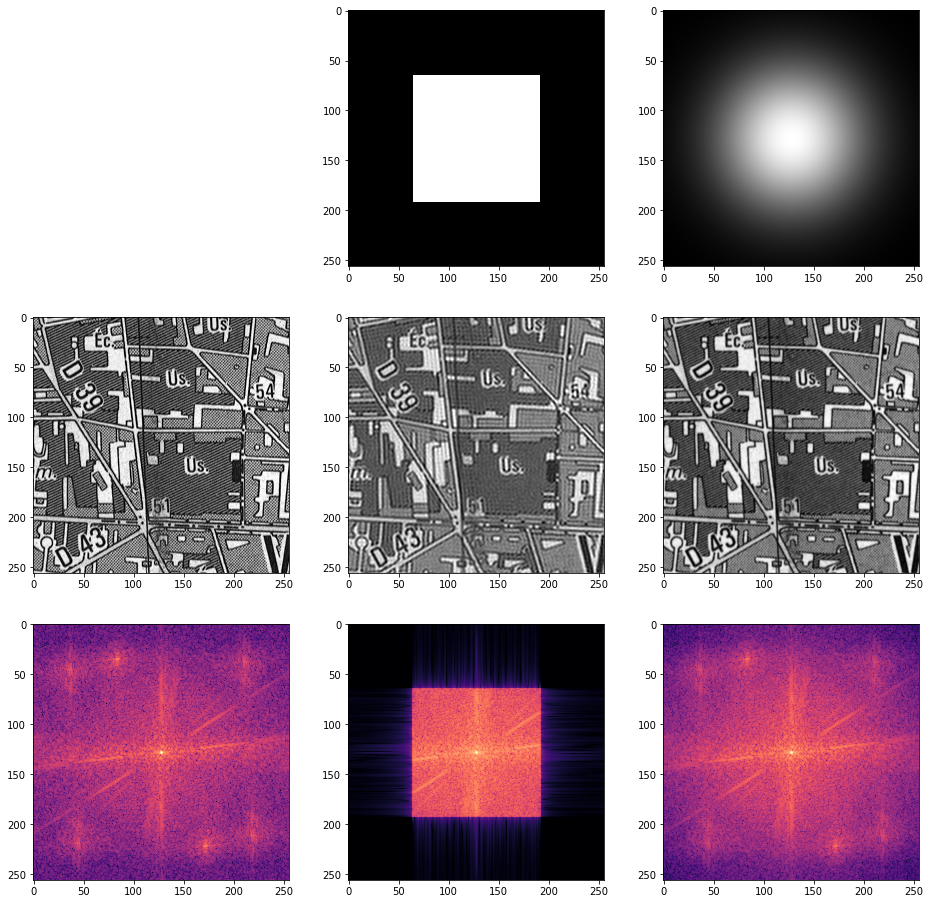

In [43]:
pb = skio.imread('./images/masque_bas_centre.tif')
gauss = skio.imread('./images/masque_gauss_centre.tif')

im = skio.imread('./images/carte_nb.tif')
im_pb = filterlow( im )
im_gauss = filtergauss( im )

tfd = spectre(im, option=2, hamming=True)
tfd_pb = spectre(im_pb, option=2, hamming=True)
tfd_gauss = spectre(im_gauss, option=2, hamming=True)

# im2 = skio.imread('./images/facade.tif')

# im1_sous = im1[::2,::2]
# im2_sous = im2[::2,::2]

# tfd1 = spectre(im1, option=2, hamming=True)   
# tfd1_sous = spectre(im1_sous, option=2, hamming=True)  

# tfd2 = spectre(im2, option=2, hamming=True)   
# tfd2_sous = spectre(im2_sous, option=2, hamming=True)  

fig, axs = plt.subplots( 3, 3, figsize=(16, 16) )
axs = axs.reshape(-1)
plt.subplots_adjust( wspace=0.2 )

axs[0].axis('off')
axs[1].imshow( viewimage( pb, normalise=False, show=False ), cmap='gray' )
axs[2].imshow( viewimage( gauss, normalise=False, show=False ), cmap='gray' )

axs[3].imshow( viewimage( im, normalise=False, show=False ), cmap='gray' )
axs[4].imshow( viewimage( im_pb, normalise=False, show=False ), cmap='gray' )
axs[5].imshow( viewimage( im_gauss, normalise=False, show=False ), cmap='gray' )

axs[6].imshow( viewimage( tfd, show=False ), cmap='magma' )
axs[7].imshow( viewimage( tfd_pb, show=False ), cmap='magma' )
axs[8].imshow( viewimage( tfd_gauss, show=False ), cmap='magma' )
    
plt.show()